In [15]:
import datetime
import pandas as pd
from pandas_datareader import data
import numpy as np
from datetime import timedelta
#pip install pandas-datareader
import time
start=time.time()
hoje =  (datetime.datetime.today() - timedelta(days=2))      ##datetime.datetime.today()

inicio=(datetime.datetime.today() - timedelta(days=320))
data1=str(hoje.year)+'-'+str(hoje.month)+'-'+str(hoje.day)
hoje

datetime.datetime(2020, 11, 20, 19, 6, 13, 342551)

In [16]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 15 11:49:27 2020

@author: theone
"""
import datetime
import pandas as pd
from pandas_datareader import data
import numpy as np
from datetime import timedelta
#pip install pandas-datareader
import time
start=time.time()

inicio=(datetime.datetime.today() - timedelta(days=320))#.strftime("%Y,%m,%d")

def RSI(dataset, n=14):
    delta = dataset.diff()
    #-----------
    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0

    RolUp = pd.Series(dUp).rolling(window=n).mean()
    RolDown = pd.Series(dDown).rolling(window=n).mean().abs()
    RS = RolUp / RolDown
    rsi= 100.0 - (100.0 / (1.0 + RS))
    return rsi

def predict(acao):

    try:
        if acao=='USDBRL=X' or acao=='^BVSP' or acao=='GC=F' or acao=='CL=F' or acao=='ZS=F' or acao=='SI=F' or acao=='^DJI' or acao=='^IXIC':
            stock=acao
        else:
            stock = '{}.SA'.format(acao)
        source = 'yahoo'
        source = 'yahoo'
        
        # Set date range (Google went public August 19, 2004)
        start =inicio#datetime.datetime(2020, 3, 1)
        end = hoje
        
        # Collect Google stock data
        goog_df = data.DataReader(stock, source, start, end)
        
        dataset = goog_df['Adj Close']

        goog_df['Adj Close'].plot(kind='line', grid=True, title='{} Adjusted Closes, IPO through 2016'.format(stock))
        
        ## FIBO DINAMICO
        max_periodo=np.max(dataset[-144:])
        min_periodo=np.min(dataset[-144:])
        
        diff=max_periodo-min_periodo
        
        primeiro_fibo=min_periodo+0.328*diff
        segundo_fibo=min_periodo+0.618*diff
        meio=min_periodo+0.5*diff
        media_verde=np.mean(dataset[-15:])
        media_vermelha=np.mean(dataset[-21:])
        
        tendencia=media_verde-media_vermelha
        print(acao,tendencia)
        fibo_superior=dataset[-1]-segundo_fibo
        #limiar_superior=(max_periodo-segundo_fibo)
        #limiar_inferior=(primeiro_fibo-min_periodo)
        
        
        fibo_inferior=dataset[-1]-primeiro_fibo
        
        rsi=RSI(goog_df.Close)[-1]

        if tendencia>0 and fibo_inferior>0 and  dataset[-1]>dataset[-5] and dataset[-1]>primeiro_fibo:
            output='buy'
            print('buy')
        elif tendencia<0 and fibo_superior<0 and dataset[-1]<dataset[-5] and dataset[-1]<segundo_fibo:
            output='short'
            print('short')
        else:
            output='wait'
            print('wait')
        close=dataset[-1]
        ganho=(max_periodo/segundo_fibo)-1
        diferenca=media_verde-media_vermelha
        oportunidade=dataset[-1]-meio
    except Exception as e:
        print(e)
        output='NA'
        close='NA'
        ganho='NA'
        diferenca='NA'
        oportunidade='NA'
        rsi='NA'
    return output, close,ganho,diferenca,oportunidade, rsi

df=pd.read_csv('Lista_Acoes_Setor.csv',sep=',',header=0)
df.columns=['Sigla','Nome_Empresa','Setor']
df['Previsao']=np.zeros(df.shape[0])
df['Close']=np.zeros(df.shape[0])
df['Potencial']=np.zeros(df.shape[0])
df['MM_diff']=np.zeros(df.shape[0])
df['eixo_xx']=np.zeros(df.shape[0])
df['Data']=np.zeros(df.shape[0])
df['IFR']=np.zeros(df.shape[0])




ZS=F 16.44523809523821
buy
ZS=F 16.44523809523821
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ZS=F 16.44523809523821
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ZS=F 16.44523809523821
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ZS=F 16.44523809523821
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ZS=F 16.44523809523821
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


SI=F 0.13591430300758134
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


SI=F 0.13591430300758134
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


SI=F 0.13591430300758134
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


SI=F 0.13591430300758134
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


SI=F 0.13591430300758134
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


SI=F 0.13591430300758134
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


CL=F 0.6486669267926857
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


CL=F 0.6486669267926857
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


CL=F 0.6486669267926857
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


CL=F 0.6486669267926857
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


CL=F 0.6486669267926857
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


CL=F 0.6486669267926857
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


USDBRL=X -0.054250535510834474
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


USDBRL=X -0.054250535510834474
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


USDBRL=X -0.054250535510834474
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


USDBRL=X -0.054250535510834474
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


USDBRL=X -0.054250535510834474
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


USDBRL=X -0.054250535510834474
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


GC=F -0.3057128906250455
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


GC=F -0.3057128906250455
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


GC=F -0.3057128906250455
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


GC=F -0.3057128906250455
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


GC=F -0.3057128906250455
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


GC=F -0.3057128906250455
short


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^IXIC 130.88133370535616
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^IXIC 130.88133370535616
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^IXIC 130.88133370535616
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^IXIC 130.88133370535616
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^IXIC 130.88133370535616
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^IXIC 130.88133370535616
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^DJI 485.89990699404734
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^DJI 485.89990699404734
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^DJI 485.89990699404734
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^DJI 485.89990699404734
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^DJI 485.89990699404734
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^DJI 485.89990699404734
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^BVSP 635.085714285713
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^BVSP 635.085714285713
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^BVSP 635.085714285713
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^BVSP 635.085714285713
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^BVSP 635.085714285713
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


^BVSP 635.085714285713
buy


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AALR3 0.009238097781228305
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AALR3 0.009238097781228305
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AALR3 0.009238097781228305
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AALR3 0.009238097781228305
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AALR3 0.009238097781228305
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AALR3 0.009238097781228305
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AAPL34 -0.20104798816498715
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AAPL34 -0.20104798816498715
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AAPL34 -0.20104798816498715
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AAPL34 -0.20104798816498715
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AAPL34 -0.20104798816498715
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AAPL34 -0.20104798816498715
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABBV34 14.535046677362345
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABBV34 14.535046677362345
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABBV34 14.535046677362345
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABBV34 14.535046677362345
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABBV34 14.535046677362345
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABBV34 14.535046677362345
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABCB4 0.0513333547682997
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABCB4 0.0513333547682997
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABCB4 0.0513333547682997
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABCB4 0.0513333547682997
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABCB4 0.0513333547682997
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ABCB4 0.0513333547682997
wait


/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr

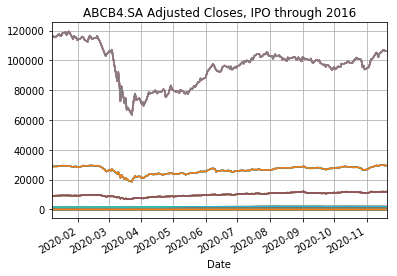

In [17]:
for i in range(0,df.shape[0]):
    try:#df.shape[0]):
        df['Previsao'].iloc[i]=predict(df.iloc[i,0])[0]
        df['Close'].iloc[i]=predict(df.iloc[i,0])[1]
        df['Potencial'].iloc[i]=predict(df.iloc[i,0])[2]
        df['MM_diff'].iloc[i]=predict(df.iloc[i,0])[3]
        df['eixo_xx'].iloc[i]=predict(df.iloc[i,0])[4]
        df['IFR'].iloc[i]=predict(df.iloc[i,0])[5]
        df['Data'].iloc[i]=data1
    except:
        pass
df['Mood']=np.zeros(df.shape[0])

for i in range(0,df.shape[0]):
    if df['Previsao'][i]=='buy':
        df['Mood'][i]=1
    if df['Previsao'][i]=='short':
        df['Mood'][i]=-1
    if df['Previsao'][i]=='wait':
        df['Mood'][i]=0
    if df['Previsao'][i]=='NA':
        df['Mood'][i]=0


In [18]:
df.Potencial

0      0.127867
1      0.184273
2      0.102712
3      0.074230
4      0.075133
         ...   
690    0.000000
691    0.000000
692    0.000000
693    0.000000
694    0.000000
Name: Potencial, Length: 695, dtype: float64

In [19]:
def norm(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

for i in range(0,df.shape[0]):
    if df.Previsao[i]=='buy':
        df['Mood'][i]=1
    elif df.Previsao[i]=='short':
        df['Mood'][i]=-1
    else:
        df['Mood'][i]=0
        
        


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df=df[df.Potencial!='NA']

/home/rubens_zimbres_intellimetri_com_/.local/lib/python3.5/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [21]:
df['Y_ForçaMM']=norm(df.Potencial)
df['X_Probabilidade_Fibo']=norm(df.eixo_xx)



In [22]:
df.columns

Index(['Sigla', 'Nome_Empresa', 'Setor', 'Previsao', 'Close', 'Potencial',
       'MM_diff', 'eixo_xx', 'Data', 'IFR', 'Mood', 'Y_ForçaMM',
       'X_Probabilidade_Fibo'],
      dtype='object')

In [23]:
df[['Sigla', 'Nome_Empresa', 'Previsao', 'Close', 'Potencial', 'MM_diff',
       'eixo_xx', 'Mood', 'Y_ForçaMM', 'X_Probabilidade_Fibo','Data','Setor','IFR']].to_csv('dataframe_PowerBI.csv',sep=',',index=False,columns=df.columns)

In [24]:
import datetime

import pandas as pd
import pytz
import numpy as np
# Construct a BigQuery client object.

# TODO(developer): Set table_id to the ID of the table to create.
# table_id = "your-project.your_dataset.your_table_name"


dataframe = pd.read_csv('dataframe_PowerBI.csv',sep=',',header=0)

dataframe=dataframe.dropna(axis=0)
dataframe.columns


Index(['Sigla', 'Nome_Empresa', 'Setor', 'Previsao', 'Close', 'Potencial',
       'MM_diff', 'eixo_xx', 'Data', 'IFR', 'Mood', 'Y_ForçaMM',
       'X_Probabilidade_Fibo'],
      dtype='object')

In [25]:
dataframe['Data'] = dataframe['Data'].astype('datetime64[ns]')
dataframe.columns=['Sigla', 'Nome_Empresa', 'Setor', 'Previsao', 'Close', 'Potencial',
       'MM_diff', 'eixo_xx', 'Data', 'IFR', 'Mood', 'Y_For__aMM',
       'X_Probabilidade_Fibo']
dataframe=dataframe[['Sigla', 'Nome_Empresa', 'Previsao', 'Close', 'Potencial', 'MM_diff',
       'eixo_xx',  'Mood', 'Y_For__aMM', 'X_Probabilidade_Fibo','Data','Setor','IFR']]
dataframe

ParserError: day is out of range for month: 0.0

In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

job_config = bigquery.LoadJobConfig(
    # Specify a (partial) schema. All columns are always written to the
    # table. The schema is used to assist in data type definitions.
    schema=[
        # Specify the type of columns whose type cannot be auto-detected. For
        # example the "title" column uses pandas dtype "object", so its
        # data type is ambiguous.
        bigquery.SchemaField("Sigla", bigquery.enums.SqlTypeNames.STRING),
        # Indexes are written if included in the schema by name.
        bigquery.SchemaField("Nome_Empresa", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("Previsao", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("Close", bigquery.enums.SqlTypeNames.FLOAT),
        bigquery.SchemaField("Potencial", bigquery.enums.SqlTypeNames.FLOAT),
        bigquery.SchemaField("MM_diff", bigquery.enums.SqlTypeNames.FLOAT),
        bigquery.SchemaField("eixo_xx", bigquery.enums.SqlTypeNames.FLOAT),
        bigquery.SchemaField("Mood", bigquery.enums.SqlTypeNames.INTEGER),
        bigquery.SchemaField("Y_For__aMM", bigquery.enums.SqlTypeNames.FLOAT),
        bigquery.SchemaField("X_Probabilidade_Fibo", bigquery.enums.SqlTypeNames.FLOAT),
        bigquery.SchemaField("Data", bigquery.enums.SqlTypeNames.DATE),
        bigquery.SchemaField("Setor", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("IFR", bigquery.enums.SqlTypeNames.FLOAT),
    ],
    # Optionally, set the write disposition. BigQuery appends loaded rows
    # to an existing table by default, but with WRITE_TRUNCATE write
    # disposition it replaces the table with the loaded data.
    write_disposition="WRITE_APPEND",
)

job = client.load_table_from_dataframe(
    dataframe, 'machinelearning-240820.fibo.fibinha', job_config=job_config
)  # Make an API request.
job.result()  # Wait for the job to complete.

